### Import Module

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

2021-08-21 21:46:46.229459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-21 21:46:46.229572: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load Data

In [2]:
keras.__version__, tf.__version__, np.__version__

('2.5.0', '2.5.0', '1.19.5')

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/home/nahid/.local/lib/python3.8/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
np.set_printoptions(linewidth=200)
train_images[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 1

In [7]:
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x7f234c761f40>, 9)

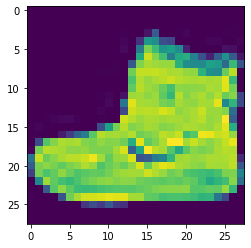

In [8]:
plt.imshow(train_images[0]), train_labels[0]

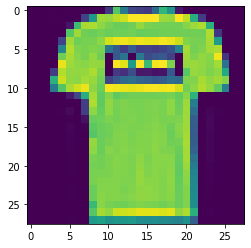

In [9]:
plt.imshow(train_images[1])

### Normalize Data

In [10]:
train_images = train_images / 255.0

In [11]:
test_images = test_images / 255.0

In [12]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

### Create Model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

2021-08-21 21:47:10.025104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-21 21:47:10.025154: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-21 21:47:10.025204: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cseru): /proc/driver/nvidia/version does not exist
2021-08-21 21:47:10.025553: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [15]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fit the Model

In [16]:
model.fit(train_images, train_labels, epochs=15)

2021-08-21 21:47:15.530943: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-08-21 21:47:16.018775: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-21 21:47:16.099956: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz


Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4996 - accuracy: 0.8254
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8653
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3388 - accuracy: 0.8764
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8857
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2960 - accuracy: 0.8906
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2799 - accuracy: 0.8962
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2683 - accuracy: 0.9006
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2570 - accuracy: 0.9041
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2466 - accuracy: 0.9079
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3404 - accuracy: 0.8873


[0.3404121696949005, 0.8873000144958496]

In [18]:
classifications = model.predict(test_images)

In [19]:
classifications[0]

array([7.6702253e-09, 8.2363845e-11, 4.9102125e-11, 1.2276460e-14, 1.7477815e-10, 9.3915573e-05, 4.7126508e-10, 1.2098435e-02, 5.8703577e-11, 9.8780769e-01], dtype=float32)

In [20]:
print(test_labels[0])

9


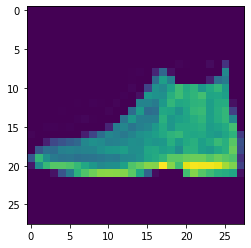

In [21]:
plt.imshow(test_images[0])

### Fashion MNIST with Callback

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.6):
            print("\nReached 60% accuracy so cancelling training!.\n")
            self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

2021-08-21 22:14:39.847199: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4763 - accuracy: 0.8298

Reached 60% accuracy so cancelling training!.



In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4075 - accuracy: 0.8539


[0.4074627757072449, 0.8539000153541565]